# Case Study on BuyAffinity Dataset (e-commerse data) :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
%matplotlib inline

In [2]:
train = pd.read_csv("BuyAffinity_train.txt", delimiter="\t")
print(train.shape)
train.head()

(101180, 24)


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,...,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,...,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,...,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


In [3]:
test = pd.read_csv("BuyAffinity_test.txt", delimiter="\t")
print(test.shape)
test.head()

(19913, 23)


,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22
0,T30234341,0.654765,0.812009,0.603190,0.391039,-5220,4825,-1784,7447,-7147,...,8074343777,5553595074,9/17/1996,8/18/1990,1,1,436,478,1,1
1,T30234342,0.694636,0.690568,0.473460,0.259760,-618,-5018,2012,9259,9267,...,-5556861821,2216284070,11/7/1985,4/11/1990,1,1,138,56,10,4
2,T30234343,0.203759,0.323301,0.492294,0.011448,-8778,6141,6965,3774,4303,...,-2121815725,-315409510,7/9/1984,5/4/1997,1,1,117,323,10,1
3,T30234344,0.319627,0.286247,0.906197,0.093840,-7929,4471,7715,9543,335,...,1389754605,-3360224957,6/3/1987,7/1/1988,1,1,115,149,16,21
4,T30234345,0.236003,0.782784,0.285689,0.383585,-3296,4564,-1580,-8559,-27,...,3653338555,7604838279,7/17/1984,12/3/1993,1,1,527,281,3,1


### Percentage of datapoints belongs to class-0 and class-1 :

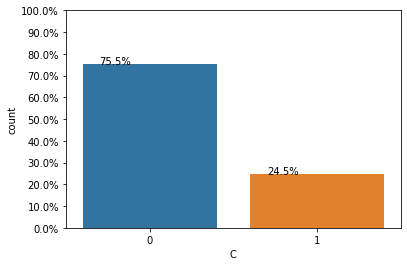

In [4]:
total = int(train.shape[0])
ax=sns.countplot(x="C", data=train)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

Dataset is highly unbalanced because 75.5% datapoints belongs to class-0 and 24.5% datapoints belongs to class-1 .

<b>The column of this dataseet are not clearly explained about which feature is what hence lets do EDA for each features and then see their behaviour.</b>

## Analysis of Features:

# F1 :

float64
Distribution plot of feature F1 for Train and Test data :


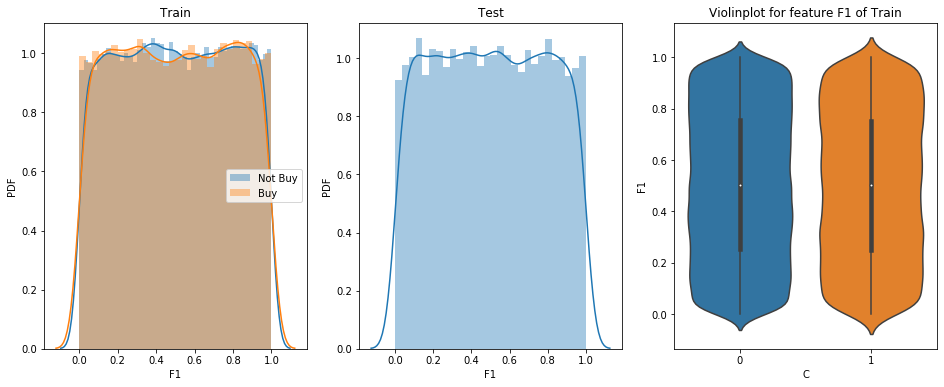

In [6]:
print(train["F1"].dtypes)
print("Distribution plot of feature F1 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F1"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F1"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F1")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F1"].values)
plt.title('Test')
plt.xlabel("F1")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F1 of Train")
sns.violinplot(x="C", y="F1", data=train)
plt.show()

In the train data datapoints belong to class-0 and class-1 are highly overlapping, but the distribution of thain datapoints and test datapoints for feature F1 are very similar.

# F2 :

float64
Distribution plot of feature F2 for Train and Test data :


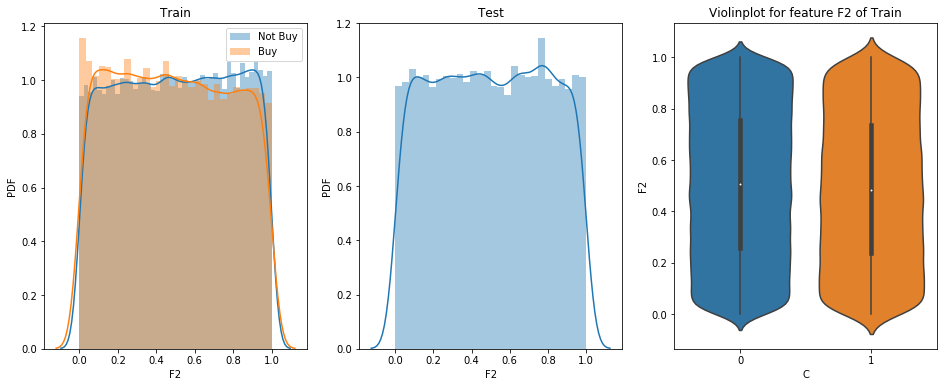

In [7]:
print(train["F2"].dtypes)
print("Distribution plot of feature F2 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F2"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F2"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F2")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F2"].values)
plt.title('Test')
plt.xlabel("F2")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F2 of Train")
sns.violinplot(x="C", y="F2", data=train)
plt.show()

points of feature F2 belong to class-0 and class-1 are highly overlapping but points whose value less than 0.5 are more likely to belongs to class-1 so this feature has some power to separate class-1 points from class-0 points.

# F3 :

float64
Distribution plot of feature F3 for Train and Test data :


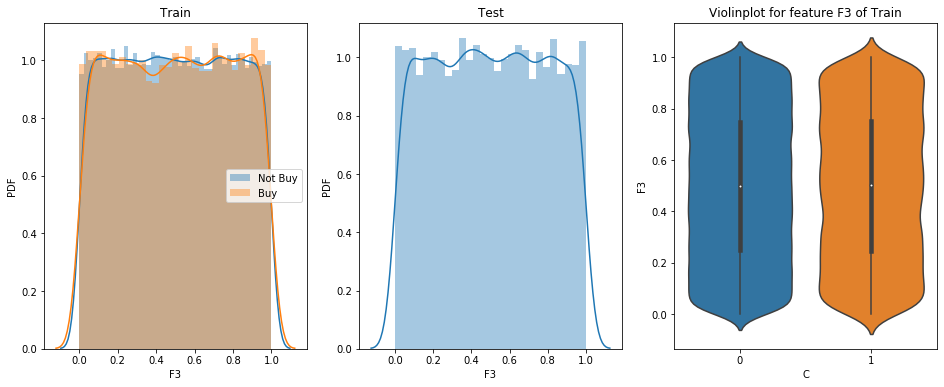

In [8]:
print(train["F3"].dtypes)
print("Distribution plot of feature F3 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F3"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F3"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F3")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F3"].values)
plt.title('Test')
plt.xlabel("F3")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F3 of Train")
sns.violinplot(x="C", y="F3", data=train)
plt.show()

overlapping between datapoints of class-0 and class-1 of feature F3 is very high and it has very power to classify class-1 from class-0

# F4 :

float64
Distribution plot of feature F4 for Train and Test data :


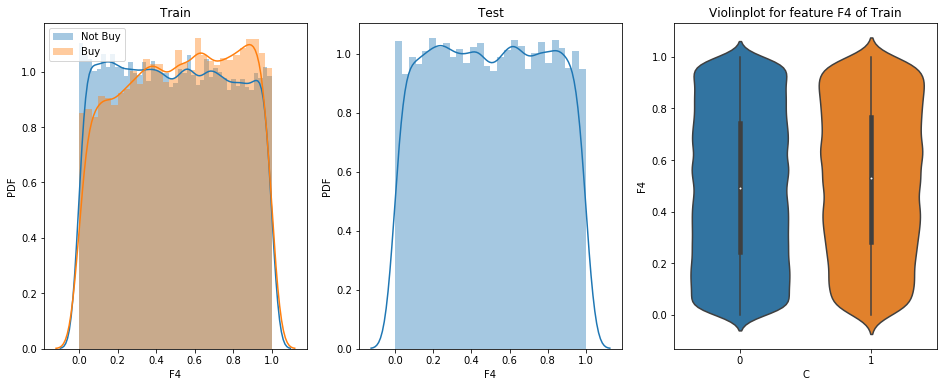

In [9]:
print(train["F4"].dtypes)
print("Distribution plot of feature F4 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F4"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F4"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F4")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F4"].values)
plt.title('Test')
plt.xlabel("F4")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F4 of Train")
sns.violinplot(x="C", y="F4", data=train)
plt.show()

The percentage of points are more belonging to class 0 when the value of F4 less than 0.4

# F5 :

int64
Distribution plot of feature F5 for Train and Test data :


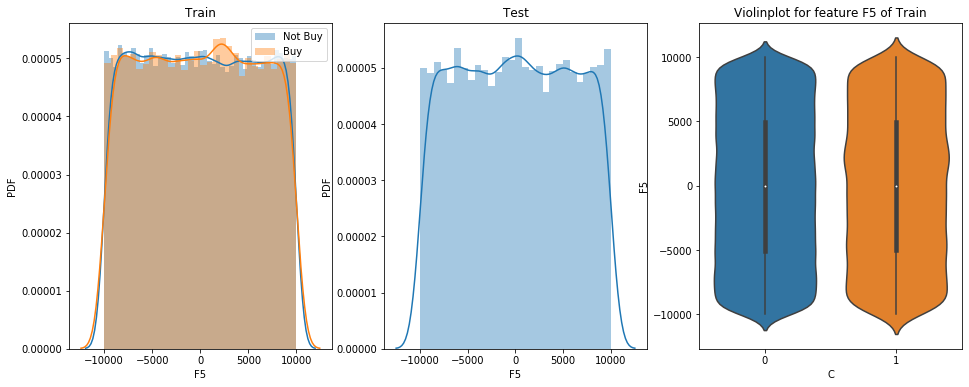

In [10]:
print(train["F5"].dtypes)
print("Distribution plot of feature F5 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F5"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F5"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F5")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F5"].values)
plt.title('Test')
plt.xlabel("F5")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F5 of Train")
sns.violinplot(x="C", y="F5", data=train)
plt.show()

both class-0 points and class-1 points are almost compeletely overlapped

# F6 :

int64
Distribution plot of feature F6 for Train and Test data :


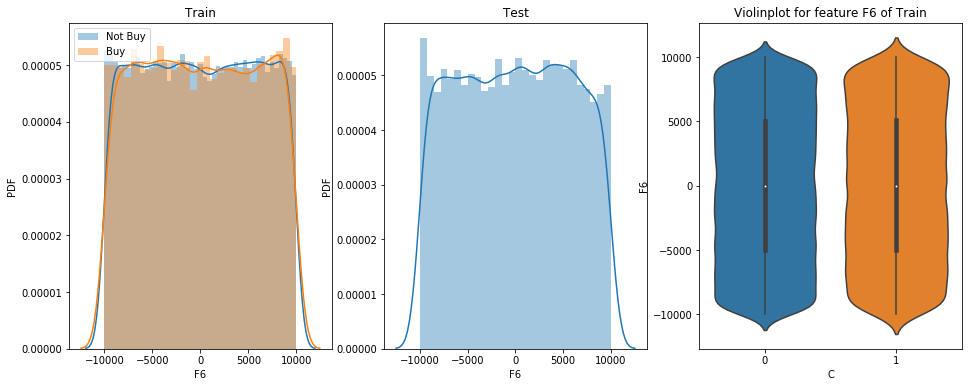

In [11]:
print(train["F6"].dtypes)
print("Distribution plot of feature F6 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F6"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F6"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F6")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F6"].values)
plt.title('Test')
plt.xlabel("F6")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F6 of Train")
sns.violinplot(x="C", y="F6", data=train)
plt.show()

# F7 :

int64
Distribution plot of feature F7 for Train and Test data :


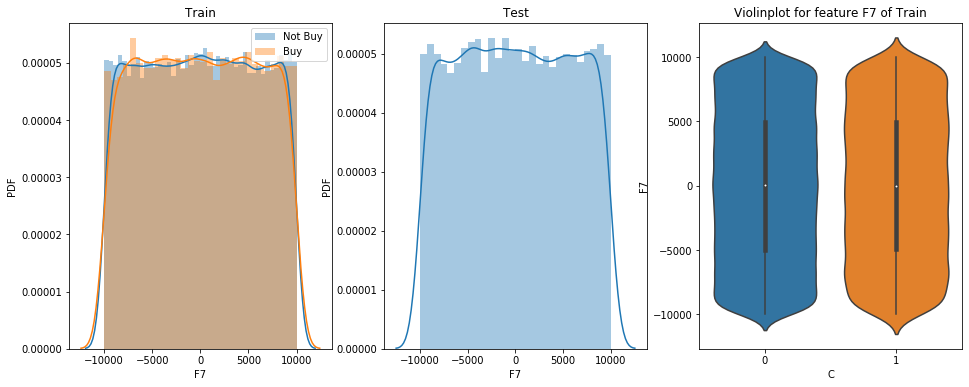

In [12]:
print(train["F7"].dtypes)
print("Distribution plot of feature F7 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F7"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F7"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F7")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F7"].values)
plt.title('Test')
plt.xlabel("F7")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F7 of Train")
sns.violinplot(x="C", y="F7", data=train)
plt.show()

# F8 :

int64
Distribution plot of feature F8 for Train and Test data :


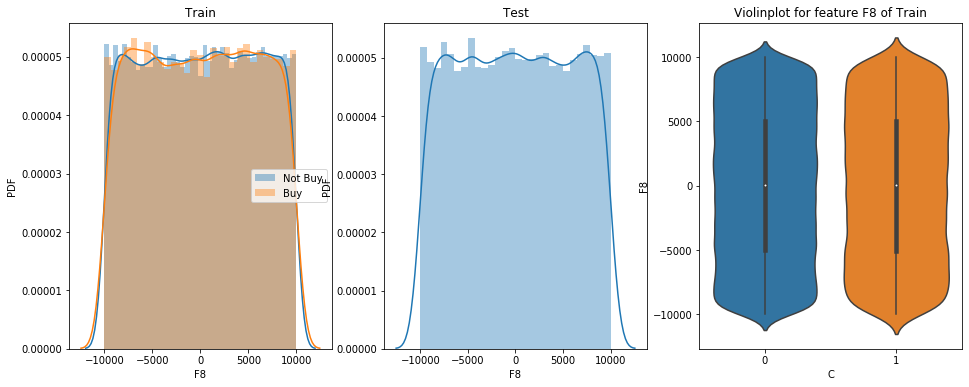

In [13]:
print(train["F8"].dtypes)
print("Distribution plot of feature F8 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F8"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F8"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F8")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F8"].values)
plt.title('Test')
plt.xlabel("F8")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F8 of Train")
sns.violinplot(x="C", y="F8", data=train)
plt.show()

# F9 :

int64
Distribution plot of feature F9 for Train and Test data :


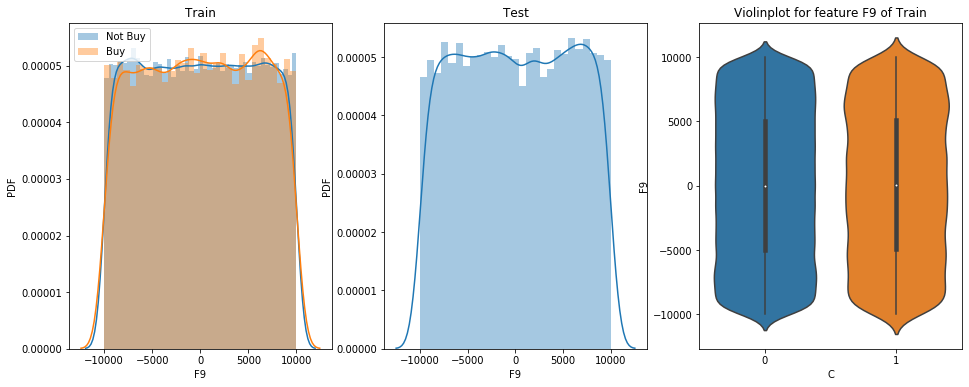

In [14]:
print(train["F9"].dtypes)
print("Distribution plot of feature F9 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F9"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F9"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F9")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F9"].values)
plt.title('Test')
plt.xlabel("F9")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F9 of Train")
sns.violinplot(x="C", y="F9", data=train)
plt.show()

### Conclusions from above EDA of features F1 to F9 :

features F1 to F4 have very similar distribution and range also very similar(0.0 to 1.0). And datapoints for class-0 and class-1 are overlapping in very high extent.

features F5 to F9 have also very similar distribution to each other but the range of values of these features lies from -10000 to +10000 and the overlapping between datapoints belonging to class-0 and class-1 is very high.

# F10 :

int64
Distribution plot of feature F10 for Train and Test data :


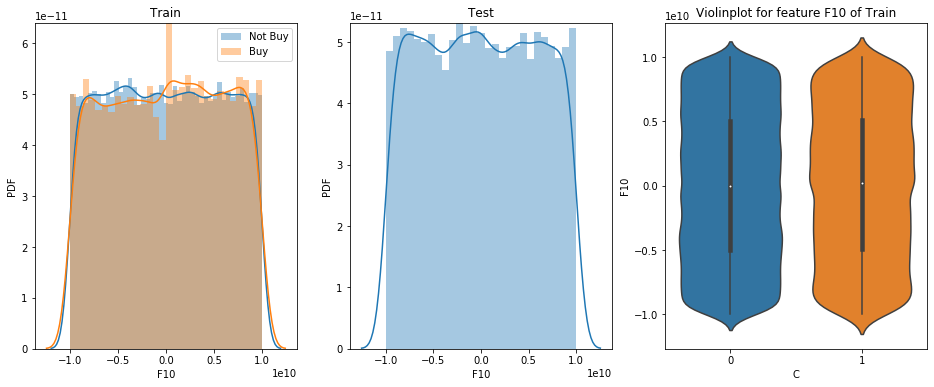

In [38]:
print(train["F10"].dtypes)
print("Distribution plot of feature F10 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F10"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F10"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F10")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F10"].values)
plt.title('Test')
plt.xlabel("F10")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F10 of Train")
sns.violinplot(x="C", y="F10", data=train)
plt.show()

In [47]:
len(train["F10"].value_counts())

101179

feature F10 is looks like userID or itemID because each row has distinct value of F10, so keep this feature and will see later whether it is important or not.

# F11 :

int64
Distribution plot of feature F11 for Train and Test data :


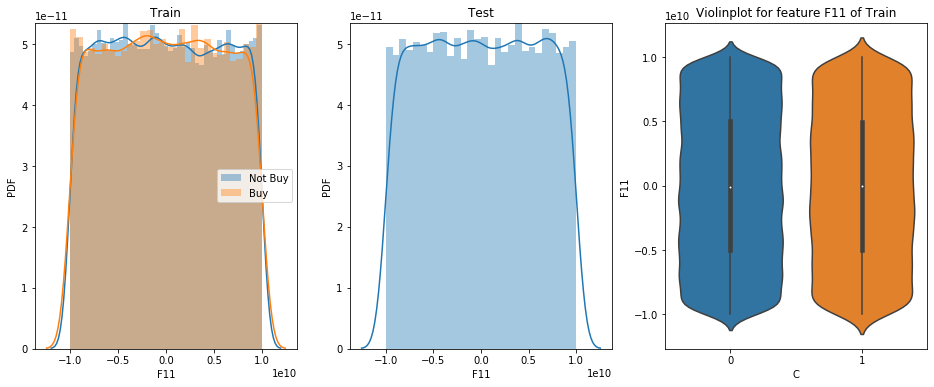

In [41]:
print(train["F11"].dtypes)
print("Distribution plot of feature F11 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F11"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F11"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F11")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F11"].values)
plt.title('Test')
plt.xlabel("F11")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F11 of Train")
sns.violinplot(x="C", y="F11", data=train)
plt.show()

In [43]:
len(train["F11"].value_counts())

101180

feature F11 is looks like userID or itemID because each row has distinct value of F11, so keep this feature and will see later whether it is important or not.

# F12 :

int64
Distribution plot of feature F12 for Train and Test data :


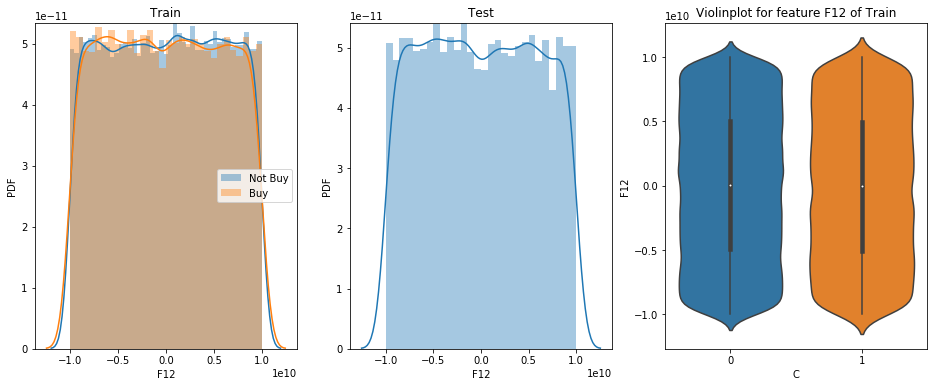

In [42]:
print(train["F12"].dtypes)
print("Distribution plot of feature F12 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F12"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F12"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F12")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F12"].values)
plt.title('Test')
plt.xlabel("F12")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F12 of Train")
sns.violinplot(x="C", y="F12", data=train)
plt.show()

In [45]:
len(train["F12"].value_counts())

101180

feature F12 is looks like userID or itemID because each row has distinct value of F12, so keep this feature and will see later whether it is important or not.

# F13 :

int64
Distribution plot of feature F13 for Train and Test data :


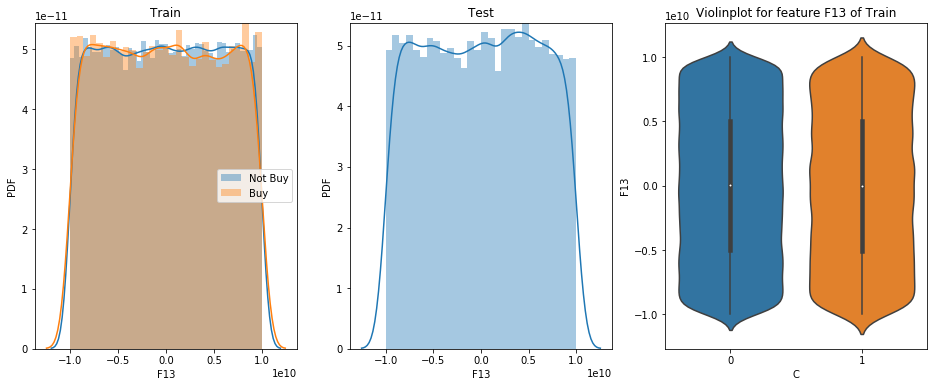

In [48]:
print(train["F13"].dtypes)
print("Distribution plot of feature F13 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F13"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F13"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F13")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F13"].values)
plt.title('Test')
plt.xlabel("F13")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F13 of Train")
sns.violinplot(x="C", y="F13", data=train)
plt.show()

In [49]:
len(train["F13"].value_counts())

101178

feature F13 is looks like userID or itemID because each row has distinct value of F13, so keep this feature and will see later whether it is important or not.

# F14 :

int64
Distribution plot of feature F14 for Train and Test data :


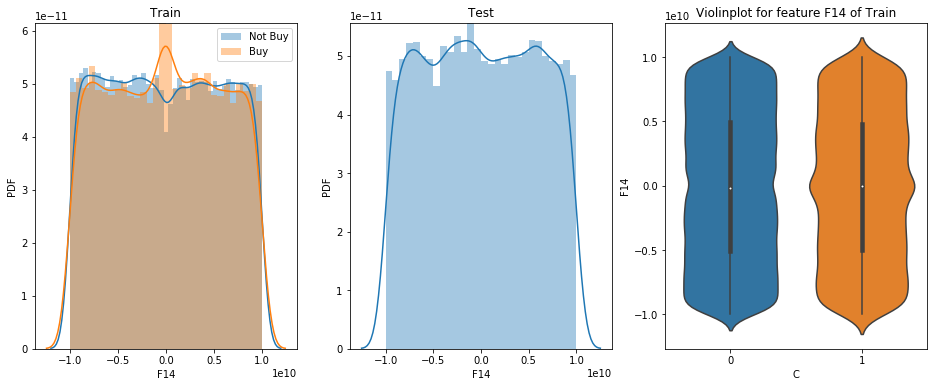

In [50]:
print(train["F14"].dtypes)
print("Distribution plot of feature F14 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F14"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F14"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F14")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F14"].values)
plt.title('Test')
plt.xlabel("F14")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F14 of Train")
sns.violinplot(x="C", y="F14", data=train)
plt.show()

In [51]:
len(train["F14"].value_counts())

101180

feature F10 to Feature F14 have almost the values are unique so these features seems like user or Item.

<b>Features F10 to F14 are under the suspense so i will remove these feature and see the performance of model</b>

## Analysis on date time feature :

In [5]:
# convert into the form mm-dd-yyy
def date_standard(date):
    date = str(date)
    date = date.replace("/","-")
    return datetime.strptime(date, '%m-%d-%Y').date()

In [6]:
train["F15"] = train["F15"].apply(date_standard)
train["F16"] = train["F16"].apply(date_standard)
test["F15"] = test["F15"].apply(date_standard)
test["F16"] = test["F16"].apply(date_standard)
train.head(2)

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,...,-3433637453,1986-10-04,1992-09-06,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,...,609277486,1979-02-24,1983-01-05,1,1,423,206,18,7,1


<b> Creating day of the week from datetime features : </b>

In [7]:
def week_day(date):
    date = pd.Timestamp(date)
    return date.weekday_name

In [8]:
pd.options.mode.chained_assignment = None

train['weekday_name_F15'] = train["F15"].apply(week_day)
test['weekday_name_F15'] = test["F15"].apply(week_day)
train['weekday_name_F16'] = train["F16"].apply(week_day)
test['weekday_name_F16'] = test["F16"].apply(week_day)

In [9]:
test['weekday_name_F15'].value_counts()

Wednesday    2899
Friday       2868
Tuesday      2854
Monday       2845
Sunday       2828
Saturday     2815
Thursday     2804
Name: weekday_name_F15, dtype: int64

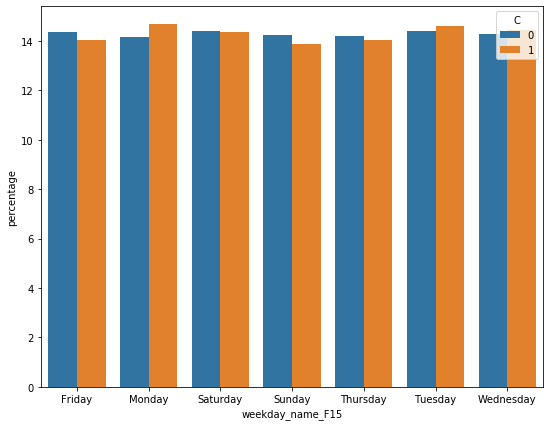

In [10]:
plt.figure(figsize=(9,7))

day_of_week_train = train.groupby(['C'])['weekday_name_F15'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('weekday_name_F15')
sns.barplot(x="weekday_name_F15", y="percentage", hue="C", data=day_of_week_train)

plt.show()

On monday and tuesday people are more likely to buy items

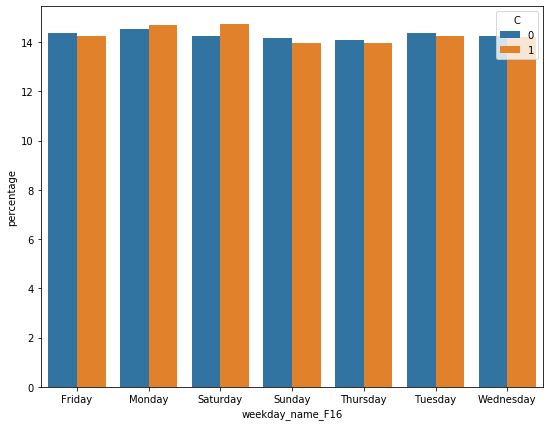

In [11]:
plt.figure(figsize=(9,7))

day_of_week = train.groupby(['C'])['weekday_name_F16'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('weekday_name_F16')
sns.barplot(x="weekday_name_F16", y="percentage", hue="C", data=day_of_week)

plt.show()

Day of week is not very useful feature to seperate the class-0 points from class-1 points because the seperability power is not very much for each class but lets keep these feature.

# F17 :

In [12]:
train["F17"].value_counts()

1    81320
2    13536
3     2426
6     2139
4     1759
Name: F17, dtype: int64

In [13]:
test["F17"].value_counts()

1    15965
2     2693
3      461
6      450
4      344
Name: F17, dtype: int64

int64


<Figure size 864x432 with 0 Axes>

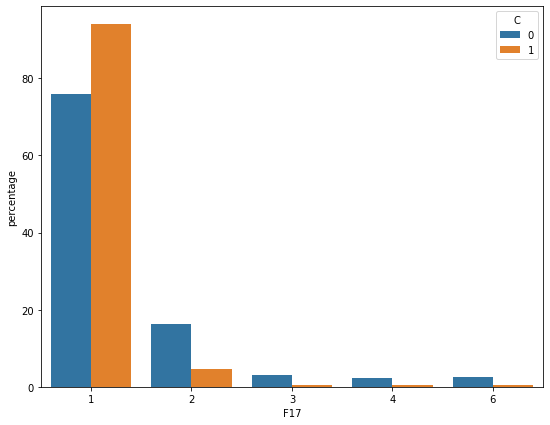

In [14]:
print(train["F17"].dtypes)
plt.figure(figsize=(12,6))

feat = train.groupby(['C'])['F17'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('F17')
plt.figure(figsize=(9,7))
sns.barplot(x="F17", y="percentage", hue="C", data=feat)

plt.show()

 F17 has values are int64 but it has only 5 distinct values and this feature is looks like categorical feature. value 3,4 and 6 are occuring very less frequent, points with value 1 are more likely to belong to class-1 

# F18 :

In [15]:
train["F18"].value_counts()

1    81432
2    13484
3     2436
6     2029
4     1799
Name: F18, dtype: int64

In [16]:
test["F18"].value_counts()

1    16026
2     2655
3      459
6      395
4      378
Name: F18, dtype: int64

int64


<Figure size 864x432 with 0 Axes>

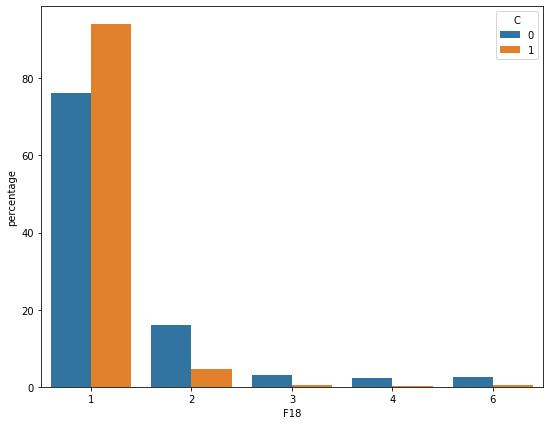

In [17]:
print(train["F18"].dtypes)
plt.figure(figsize=(12,6))

feat = train.groupby(['C'])['F18'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('F18')
plt.figure(figsize=(9,7))
sns.barplot(x="F18", y="percentage", hue="C", data=feat)

plt.show()

F18 has values are int64 but it has only 5 distinct values and this feature is looks like categorical feature. value 3,4 and 6 are occuring very less frequent, points with value 1 are more likely to belong to class-1

# F19 :

int64
Distribution plot of feature F19 for Train and Test data :


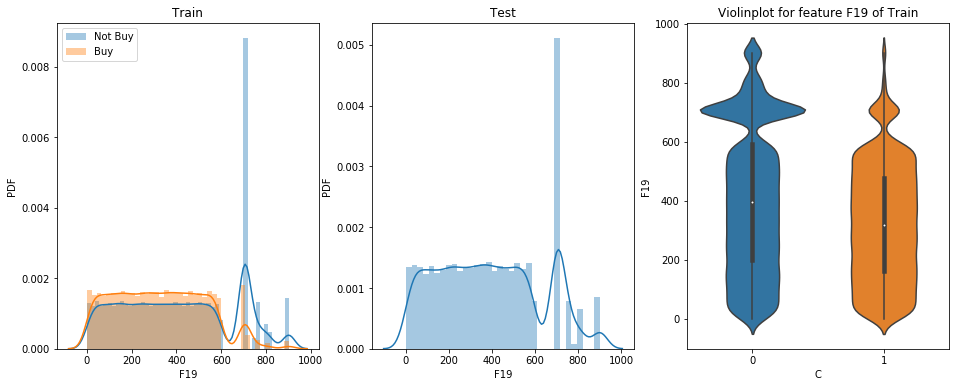

In [19]:
print(train["F19"].dtypes)
print("Distribution plot of feature F19 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F19"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F19"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F19")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F19"].values)
plt.title('Test')
plt.xlabel("F19")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F19 of Train")
sns.violinplot(x="C", y="F19", data=train)
plt.show()

values of feature F19 between 0 to 600 are compeletely overlapping and values around 700 are more frequent and more points belong to class-0 so this feature has some power to seperate class-1 from class-0 points.

# F20 :

int64
Distribution plot of feature F20 for Train and Test data :


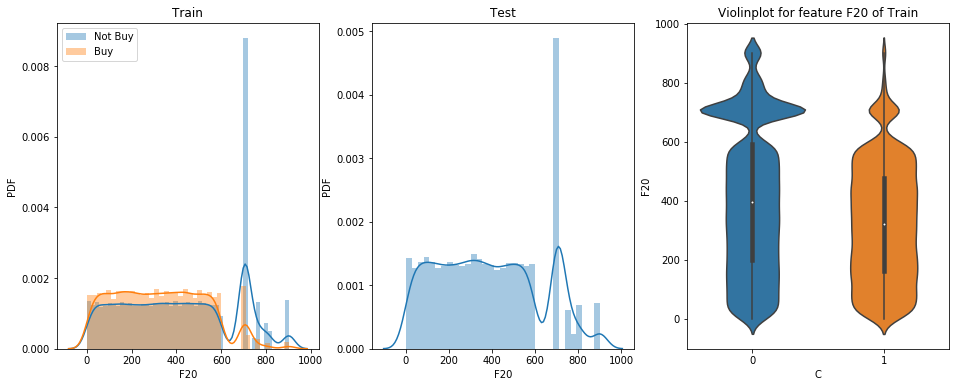

In [20]:
print(train["F20"].dtypes)
print("Distribution plot of feature F20 for Train and Test data :")
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.distplot(train[train["C"]==0]["F20"].values, label="Not Buy")
sns.distplot(train[train["C"]==1]["F20"].values, label="Buy")
plt.legend()
plt.title('Train')
plt.xlabel("F20")
plt.ylabel("PDF")
plt.subplot(1,3,2)
sns.distplot(test["F20"].values)
plt.title('Test')
plt.xlabel("F20")
plt.ylabel("PDF")
plt.subplot(1,3,3)
plt.title("Violinplot for feature F20 of Train")
sns.violinplot(x="C", y="F20", data=train)
plt.show()

values of feature F20 between 0 to 600 are compeletely overlapping and values around 700 are more frequent and more points belong to class-0 so this feature has some power to seperate class-1 from class-0 points.

# F21 :

In [21]:
print(train["F21"].value_counts())
print("="*40)
print(test["F21"].value_counts())

1     41565
2      8157
3      7229
4      7022
5      5912
6      5138
7      4548
8      3822
10     3261
9      3201
11     2835
21     2807
12     1285
13     1224
14      910
15      650
16      538
17      319
18      266
19      249
20      242
Name: F21, dtype: int64
1     7995
2     1633
3     1459
4     1393
5     1212
6      992
7      922
8      717
9      667
10     657
11     585
21     566
12     273
13     234
14     195
15     119
16     102
17      53
20      53
18      43
19      43
Name: F21, dtype: int64


int64


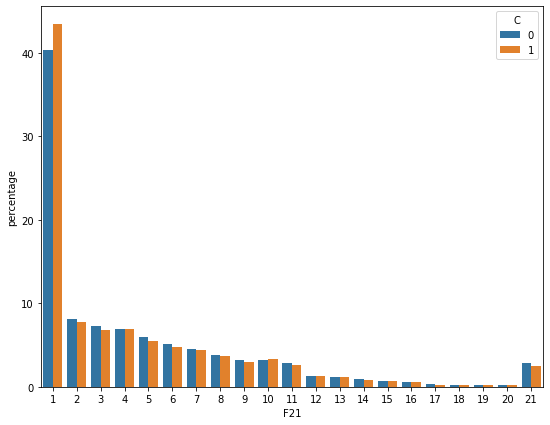

In [22]:
print(train["F21"].dtypes)
plt.figure(figsize=(9,7))

feat = train.groupby(['C'])['F21'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('F21')
sns.barplot(x="F21", y="percentage", hue="C", data=feat)

plt.show()

feature F21 have int64 values but it have only 21 distinct values so this feature is looks like categorical feature sone values have very high frequency but some other values have lery less frequency, points with value1 are more lokely to be belongs to class-1 and points with value other than 1 have almost same fraction of class-0 and class1.

# F22 :

In [23]:
print(train["F22"].value_counts())
print("="*40)
print(test["F22"].value_counts())

1     41408
2      8048
3      7198
4      7103
5      6069
6      5246
7      4519
8      3818
10     3273
9      3167
21     2872
11     2802
12     1319
13     1184
14     1004
15      637
16      526
17      278
18      262
20      226
19      221
Name: F22, dtype: int64
1     8129
2     1685
4     1411
3     1390
5     1158
6     1025
7      916
8      696
9      651
10     621
11     592
21     522
12     252
13     226
14     191
15     117
16     113
17      70
20      54
19      49
18      45
Name: F22, dtype: int64


int64


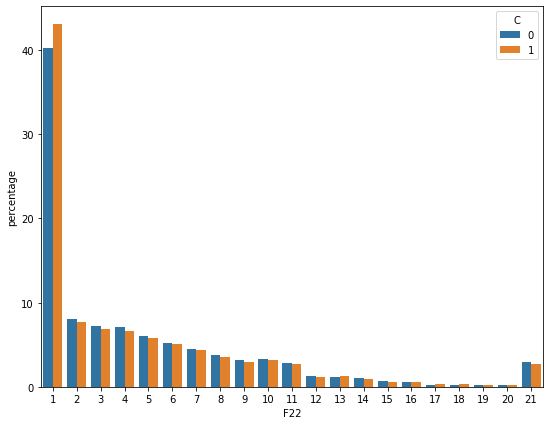

In [24]:
print(train["F22"].dtypes)
plt.figure(figsize=(9,7))

feat = train.groupby(['C'])['F22'].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values('F22')
sns.barplot(x="F22", y="percentage", hue="C", data=feat)

plt.show()

feature F22 have int64 values but it have only 21 distinct values so this feature is looks like categorical feature sone values have very high frequency but some other values have lery less frequency, points with value1 are more lokely to be belongs to class-1 and points with value other than 1 have almost same fraction of class-0 and class1.

### Lets experiment of creating some aggregation feature engineering on F5 to F9 using F17,F18 and Dat_of week :

In [26]:
train['F5_to_mean_F17'] = train['F5'] / train.groupby(['F17'])['F5'].transform('mean')
train['F5_to_mean_F18'] = train['F5'] / train.groupby(['F18'])['F5'].transform('mean')
train['F5_to_std_F17'] = train['F5'] / train.groupby(['F17'])['F5'].transform('std')
train['F5_to_std_F18'] = train['F5'] / train.groupby(['F18'])['F5'].transform('std')
test['F5_to_mean_F17'] = test['F5'] / test.groupby(['F17'])['F5'].transform('mean')
test['F5_to_mean_F18'] = test['F5'] / test.groupby(['F18'])['F5'].transform('mean')
test['F5_to_std_F17'] = test['F5'] / test.groupby(['F17'])['F5'].transform('std')
test['F5_to_std_F18'] = test['F5'] / test.groupby(['F18'])['F5'].transform('std')

train['F6_to_mean_F17'] = train['F6'] / train.groupby(['F17'])['F6'].transform('mean')
train['F6_to_mean_F18'] = train['F6'] / train.groupby(['F18'])['F6'].transform('mean')
train['F6_to_std_F17'] = train['F6'] / train.groupby(['F17'])['F6'].transform('std')
train['F6_to_std_F18'] = train['F6'] / train.groupby(['F18'])['F6'].transform('std')
test['F6_to_mean_F17'] = test['F6'] / test.groupby(['F17'])['F6'].transform('mean')
test['F6_to_mean_F18'] = test['F6'] / test.groupby(['F18'])['F6'].transform('mean')
test['F6_to_std_F17'] = test['F6'] / test.groupby(['F17'])['F6'].transform('std')
test['F6_to_std_F18'] = test['F6'] / test.groupby(['F18'])['F6'].transform('std')

train['F7_to_mean_F17'] = train['F7'] / train.groupby(['F17'])['F7'].transform('mean')
train['F7_to_mean_F18'] = train['F7'] / train.groupby(['F18'])['F7'].transform('mean')
train['F7_to_std_F17'] = train['F7'] / train.groupby(['F17'])['F7'].transform('std')
train['F7_to_std_F18'] = train['F7'] / train.groupby(['F18'])['F7'].transform('std')
test['F7_to_mean_F17'] = test['F7'] / test.groupby(['F17'])['F7'].transform('mean')
test['F7_to_mean_F18'] = test['F7'] / test.groupby(['F18'])['F7'].transform('mean')
test['F7_to_std_F17'] = test['F7'] / test.groupby(['F17'])['F7'].transform('std')
test['F7_to_std_F18'] = test['F7'] / test.groupby(['F18'])['F7'].transform('std')

train['F8_to_mean_F17'] = train['F8'] / train.groupby(['F17'])['F8'].transform('mean')
train['F8_to_mean_F18'] = train['F8'] / train.groupby(['F18'])['F8'].transform('mean')
train['F8_to_std_F17'] = train['F8'] / train.groupby(['F17'])['F8'].transform('std')
train['F8_to_std_F18'] = train['F8'] / train.groupby(['F18'])['F8'].transform('std')
test['F8_to_mean_F17'] = test['F8'] / test.groupby(['F17'])['F8'].transform('mean')
test['F8_to_mean_F18'] = test['F8'] / test.groupby(['F18'])['F8'].transform('mean')
test['F8_to_std_F17'] = test['F8'] / test.groupby(['F17'])['F8'].transform('std')
test['F8_to_std_F18'] = test['F8'] / test.groupby(['F18'])['F8'].transform('std')

train['F9_to_mean_F17'] = train['F9'] / train.groupby(['F17'])['F9'].transform('mean')
train['F9_to_mean_F18'] = train['F9'] / train.groupby(['F18'])['F9'].transform('mean')
train['F9_to_std_F17'] = train['F9'] / train.groupby(['F17'])['F9'].transform('std')
train['F9_to_std_F18'] = train['F9'] / train.groupby(['F18'])['F9'].transform('std')
test['F9_to_mean_F17'] = test['F9'] / test.groupby(['F17'])['F9'].transform('mean')
test['F9_to_mean_F18'] = test['F9'] / test.groupby(['F18'])['F9'].transform('mean')
test['F9_to_std_F17'] = test['F9'] / test.groupby(['F17'])['F9'].transform('std')
test['F9_to_std_F18'] = test['F9'] / test.groupby(['F18'])['F9'].transform('std')

In [28]:
train['F5_to_mean_weekday_name_F15'] = train['F5'] / train.groupby(['weekday_name_F15'])['F5'].transform('mean')
train['F5_to_mean_weekday_name_F16'] = train['F5'] / train.groupby(['weekday_name_F16'])['F5'].transform('mean')
train['F5_to_std_weekday_name_F15'] = train['F5'] / train.groupby(['weekday_name_F15'])['F5'].transform('std')
train['F5_to_std_weekday_name_F16'] = train['F5'] / train.groupby(['weekday_name_F16'])['F5'].transform('std')
test['F5_to_mean_weekday_name_F15'] = test['F5'] / test.groupby(['weekday_name_F15'])['F5'].transform('mean')
test['F5_to_mean_weekday_name_F16'] = test['F5'] / test.groupby(['weekday_name_F16'])['F5'].transform('mean')
test['F5_to_std_weekday_name_F15'] = test['F5'] / test.groupby(['weekday_name_F15'])['F5'].transform('std')
test['F5_to_std_weekday_name_F16'] = test['F5'] / test.groupby(['weekday_name_F16'])['F5'].transform('std')

train['F6_to_mean_weekday_name_F15'] = train['F6'] / train.groupby(['weekday_name_F15'])['F6'].transform('mean')
train['F6_to_mean_weekday_name_F16'] = train['F6'] / train.groupby(['weekday_name_F16'])['F6'].transform('mean')
train['F6_to_std_weekday_name_F15'] = train['F6'] / train.groupby(['weekday_name_F15'])['F6'].transform('std')
train['F6_to_std_weekday_name_F16'] = train['F6'] / train.groupby(['weekday_name_F16'])['F6'].transform('std')
test['F6_to_mean_weekday_name_F15'] = test['F6'] / test.groupby(['weekday_name_F15'])['F6'].transform('mean')
test['F6_to_mean_weekday_name_F16'] = test['F6'] / test.groupby(['weekday_name_F16'])['F6'].transform('mean')
test['F6_to_std_weekday_name_F15'] = test['F6'] / test.groupby(['weekday_name_F15'])['F6'].transform('std')
test['F6_to_std_weekday_name_F16'] = test['F6'] / test.groupby(['weekday_name_F16'])['F6'].transform('std')

train['F7_to_mean_weekday_name_F15'] = train['F7'] / train.groupby(['weekday_name_F15'])['F7'].transform('mean')
train['F7_to_mean_weekday_name_F16'] = train['F7'] / train.groupby(['weekday_name_F16'])['F7'].transform('mean')
train['F7_to_std_weekday_name_F15'] = train['F7'] / train.groupby(['weekday_name_F15'])['F7'].transform('std')
train['F7_to_std_weekday_name_F16'] = train['F7'] / train.groupby(['weekday_name_F16'])['F7'].transform('std')
test['F7_to_mean_weekday_name_F15'] = test['F7'] / test.groupby(['weekday_name_F15'])['F7'].transform('mean')
test['F7_to_mean_weekday_name_F16'] = test['F7'] / test.groupby(['weekday_name_F16'])['F7'].transform('mean')
test['F7_to_std_weekday_name_F15'] = test['F7'] / test.groupby(['weekday_name_F15'])['F7'].transform('std')
test['F7_to_std_weekday_name_F16'] = test['F7'] / test.groupby(['weekday_name_F16'])['F7'].transform('std')

train['F8_to_mean_weekday_name_F15'] = train['F8'] / train.groupby(['weekday_name_F15'])['F8'].transform('mean')
train['F8_to_mean_weekday_name_F16'] = train['F8'] / train.groupby(['weekday_name_F16'])['F8'].transform('mean')
train['F8_to_std_weekday_name_F15'] = train['F8'] / train.groupby(['weekday_name_F15'])['F8'].transform('std')
train['F8_to_std_weekday_name_F16'] = train['F8'] / train.groupby(['weekday_name_F16'])['F8'].transform('std')
test['F8_to_mean_weekday_name_F15'] = test['F8'] / test.groupby(['weekday_name_F15'])['F8'].transform('mean')
test['F8_to_mean_weekday_name_F16'] = test['F8'] / test.groupby(['weekday_name_F16'])['F8'].transform('mean')
test['F8_to_std_weekday_name_F15'] = test['F8'] / test.groupby(['weekday_name_F15'])['F8'].transform('std')
test['F8_to_std_weekday_name_F16'] = test['F8'] / test.groupby(['weekday_name_F16'])['F8'].transform('std')

train['F9_to_mean_weekday_name_F15'] = train['F9'] / train.groupby(['weekday_name_F15'])['F9'].transform('mean')
train['F9_to_mean_weekday_name_F16'] = train['F9'] / train.groupby(['weekday_name_F16'])['F9'].transform('mean')
train['F9_to_std_weekday_name_F15'] = train['F9'] / train.groupby(['weekday_name_F15'])['F9'].transform('std')
train['F9_to_std_weekday_name_F16'] = train['F9'] / train.groupby(['weekday_name_F16'])['F9'].transform('std')
test['F9_to_mean_weekday_name_F15'] = test['F9'] / test.groupby(['weekday_name_F15'])['F9'].transform('mean')
test['F9_to_mean_weekday_name_F16'] = test['F9'] / test.groupby(['weekday_name_F16'])['F9'].transform('mean')
test['F9_to_std_weekday_name_F15'] = test['F9'] / test.groupby(['weekday_name_F15'])['F9'].transform('std')
test['F9_to_std_weekday_name_F16'] = test['F9'] / test.groupby(['weekday_name_F16'])['F9'].transform('std')

I did some feature engineering on feature F5 to F9 using some categorical features because F5 to F9 features have very high range of values , it is just an experiment and lets see whether this features will be useful or not.

In [30]:
# removing datetime features because i have created day of week feature from these features and from domain knowledge datetime will not affet whether a person place order or not.

train.drop(["F15","F16"], axis=1, inplace=True)
test.drop(["F15","F16"], axis=1, inplace=True)

### checking the correlation between various features, and see which features are correlated to each other.

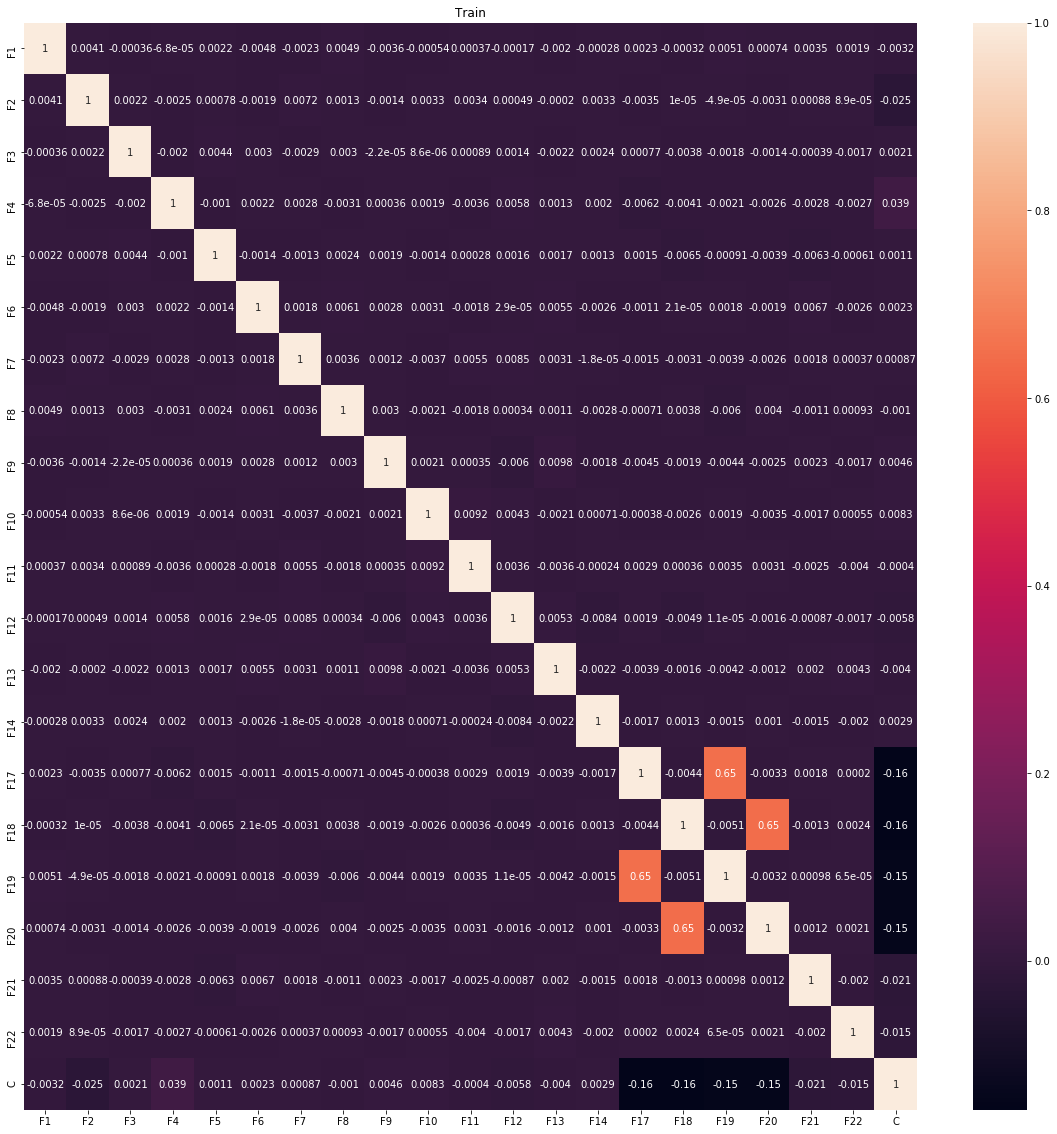

In [34]:
train_corr =train[["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F17","F18","F19","F20","F21","F22","C"]].corr()
plt.figure(figsize=(20,20))
sns.heatmap(train_corr,annot=True)
plt.title("Train")
plt.show()

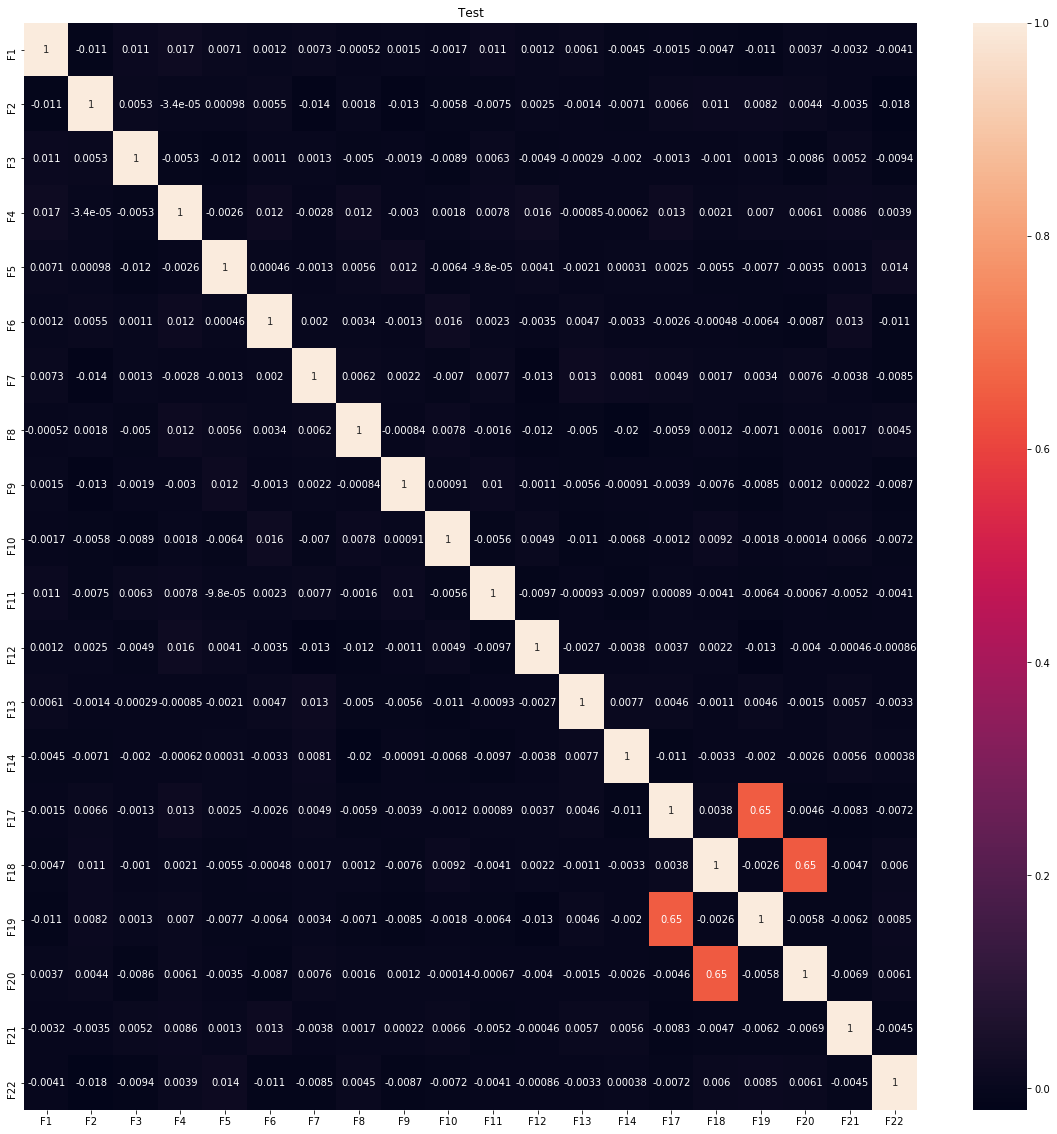

In [35]:
test_corr =test[["F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F17","F18","F19","F20","F21","F22"]].corr()
plt.figure(figsize=(20,20))
sns.heatmap(test_corr,annot=True)
plt.title("Test")
plt.show()

features F17-F19 and F18-F20 are correlated with score 0.65 and rest feature are very less correlated to each other. so keep all the features. 

In [ ]:
# save preprocessed dataset to disk to use later.

train.to_csv("preprocessed_BuyAffinity_train.csv")
test.to_csv("preprocessed_BuyAffinity_test.csv")